# English Premier League (EPL) Pythagorean Predictor

In [134]:
# Load the packages

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
# Load the data. 
# EPL results for the 2017/18 season

EPL18_7 = pd.read_excel('Assignment Data/Week 1/EPL2017-18.xlsx')
print(EPL18_7.columns.tolist())

['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']


In [139]:
# view the df

EPL18_7

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,20170811,Arsenal,Leicester,4,3,H
1,20170812,Brighton,Man City,0,2,A
2,20170812,Chelsea,Burnley,2,3,A
3,20170812,Crystal Palace,Huddersfield,0,3,A
4,20170812,Everton,Stoke,1,0,H
5,20170812,Southampton,Swansea,0,0,D
6,20170812,Watford,Liverpool,3,3,D
7,20170812,West Brom,Bournemouth,1,0,H
8,20170813,Man United,West Ham,4,0,H
9,20170813,Newcastle,Tottenham,0,2,A


In [140]:
# Here you assign values to three auxiliary columns to facilitate the calculation of team performance:

EPL18_7['hwinvalue']=np.where(EPL18_7['FTR']=='H',1,np.where(EPL18_7['FTR']=='D',.5,0))
EPL18_7['awinvalue']=np.where(EPL18_7['FTR']=='A',1,np.where(EPL18_7['FTR']=='D',.5,0))
EPL18_7['count']=1

In [141]:
# taking the data from 2017
EPL17 = EPL18_7[EPL18.Date < 20180000]
EPL17.describe()

,Date,FTHG,FTAG,hwinvalue,awinvalue,count
count,2.090000e+02,209.000000,209.000000,209.000000,209.000000,209.0
mean,2.017106e+07,1.473684,1.181818,0.574163,0.425837,1.0
std,1.451426e+02,1.362452,1.273039,0.422336,0.422336,0.0
min,2.017081e+07,0.000000,0.000000,0.000000,0.000000,1.0
25%,2.017092e+07,0.000000,0.000000,0.000000,0.000000,1.0
50%,2.017110e+07,1.000000,1.000000,0.500000,0.500000,1.0
75%,2.017121e+07,2.000000,2.000000,1.000000,1.000000,1.0
max,2.017123e+07,7.000000,6.000000,1.000000,1.000000,1.0


In [142]:
# taking the data from 2018
EPL18 = EPL18_7[EPL18.Date > 20180000]
EPL18.describe()

,Date,FTHG,FTAG,hwinvalue,awinvalue,count
count,1.710000e+02,171.000000,171.000000,171.000000,171.000000,171.0
mean,2.018030e+07,1.602339,1.105263,0.599415,0.400585,1.0
std,1.400601e+02,1.312741,1.051904,0.422248,0.422248,0.0
min,2.018010e+07,0.000000,0.000000,0.000000,0.000000,1.0
25%,2.018020e+07,1.000000,0.000000,0.000000,0.000000,1.0
50%,2.018031e+07,1.000000,1.000000,0.500000,0.500000,1.0
75%,2.018042e+07,2.000000,2.000000,1.000000,1.000000,1.0
max,2.018051e+07,5.000000,4.000000,1.000000,1.000000,1.0


In [143]:
# grouping by: home team and year 2017
PerfHome17 = EPL17.groupby(['HomeTeam'])['count','hwinvalue', 'FTHG','FTAG',].sum().reset_index()
PerfHome17 = PerfHome17.rename(columns={'HomeTeam':'team','count':'Ph','FTHG':'FTHGh','FTAG':'FTAGh'})
PerfHome17

,team,Ph,hwinvalue,FTHGh,FTAGh
0,Arsenal,10,8.5,25,10
1,Bournemouth,11,4.5,14,17
2,Brighton,10,5.5,10,12
3,Burnley,10,6.0,7,6
4,Chelsea,11,8.5,21,7
5,Crystal Palace,11,5.0,14,18
6,Everton,10,6.5,17,13
7,Huddersfield,11,6.0,10,12
8,Leicester,10,5.0,13,14
9,Liverpool,11,8.5,21,4


In [144]:
# grouping by: away team and year 2017
PerfAway17 = EPL17.groupby(['AwayTeam'])['count','awinvalue', 'FTHG','FTAG'].sum().reset_index()
PerfAway17 = PerfAway17.rename(columns={'AwayTeam':'team','count':'Pa','FTHG':'FTHGa','FTAG':'FTAGa'})
PerfAway17

,team,Pa,awinvalue,FTHGa,FTAGa
0,Arsenal,11,5.0,16,13
1,Bournemouth,10,3.0,15,6
2,Brighton,11,3.0,13,5
3,Burnley,11,6.5,11,11
4,Chelsea,10,7.0,7,18
5,Crystal Palace,10,2.5,14,4
6,Everton,11,3.5,19,8
7,Huddersfield,10,3.0,20,8
8,Leicester,11,5.0,18,18
9,Liverpool,10,6.5,20,27


In [145]:
# merging the tables, with 'team' as a common column
Perf17 = pd.merge(PerfAway17, PerfHome17, on = ['team'])
Perf17

,team,Pa,awinvalue,FTHGa,FTAGa,Ph,hwinvalue,FTHGh,FTAGh
0,Arsenal,11,5.0,16,13,10,8.5,25,10
1,Bournemouth,10,3.0,15,6,11,4.5,14,17
2,Brighton,11,3.0,13,5,10,5.5,10,12
3,Burnley,11,6.5,11,11,10,6.0,7,6
4,Chelsea,10,7.0,7,18,11,8.5,21,7
5,Crystal Palace,10,2.5,14,4,11,5.0,14,18
6,Everton,11,3.5,19,8,10,6.5,17,13
7,Huddersfield,10,3.0,20,8,11,6.0,10,12
8,Leicester,11,5.0,18,18,10,5.0,13,14
9,Liverpool,10,6.5,20,27,11,8.5,21,4


In [146]:
# Total Team Performance Calculation - 2017 Season

Perf17['W'] = Perf17['hwinvalue']+Perf17['awinvalue']
Perf17['G'] = Perf17['Ph']+Perf17['Pa']
Perf17['GF'] = Perf17['FTHGh']+Perf17['FTAGa']
Perf17['GA'] = Perf17['FTAGh']+Perf17['FTHGa']
Perf17

,team,Pa,awinvalue,FTHGa,FTAGa,Ph,hwinvalue,FTHGh,FTAGh,W,G,GF,GA
0,Arsenal,11,5.0,16,13,10,8.5,25,10,13.5,21,38,26
1,Bournemouth,10,3.0,15,6,11,4.5,14,17,7.5,21,20,32
2,Brighton,11,3.0,13,5,10,5.5,10,12,8.5,21,15,25
3,Burnley,11,6.5,11,11,10,6.0,7,6,12.5,21,18,17
4,Chelsea,10,7.0,7,18,11,8.5,21,7,15.5,21,39,14
5,Crystal Palace,10,2.5,14,4,11,5.0,14,18,7.5,21,18,32
6,Everton,11,3.5,19,8,10,6.5,17,13,10.0,21,25,32
7,Huddersfield,10,3.0,20,8,11,6.0,10,12,9.0,21,18,32
8,Leicester,11,5.0,18,18,10,5.0,13,14,10.0,21,31,32
9,Liverpool,10,6.5,20,27,11,8.5,21,4,15.0,21,48,24


In [147]:
# Calculation of Real and Theoretical Utilization

Perf17['wpc'] = Perf17['W']/Perf17['G']
Perf17['pyth'] = Perf17['GF']**2/(Perf17['GF']**2 + Perf17['GA']**2)
Perf17

,team,Pa,awinvalue,FTHGa,FTAGa,Ph,hwinvalue,FTHGh,FTAGh,W,G,GF,GA,wpc,pyth
0,Arsenal,11,5.0,16,13,10,8.5,25,10,13.5,21,38,26,0.642857,0.681132
1,Bournemouth,10,3.0,15,6,11,4.5,14,17,7.5,21,20,32,0.357143,0.280899
2,Brighton,11,3.0,13,5,10,5.5,10,12,8.5,21,15,25,0.404762,0.264706
3,Burnley,11,6.5,11,11,10,6.0,7,6,12.5,21,18,17,0.595238,0.528548
4,Chelsea,10,7.0,7,18,11,8.5,21,7,15.5,21,39,14,0.738095,0.885847
5,Crystal Palace,10,2.5,14,4,11,5.0,14,18,7.5,21,18,32,0.357143,0.240356
6,Everton,11,3.5,19,8,10,6.5,17,13,10.0,21,25,32,0.476190,0.379018
7,Huddersfield,10,3.0,20,8,11,6.0,10,12,9.0,21,18,32,0.428571,0.240356
8,Leicester,11,5.0,18,18,10,5.0,13,14,10.0,21,31,32,0.476190,0.484131
9,Liverpool,10,6.5,20,27,11,8.5,21,4,15.0,21,48,24,0.714286,0.800000


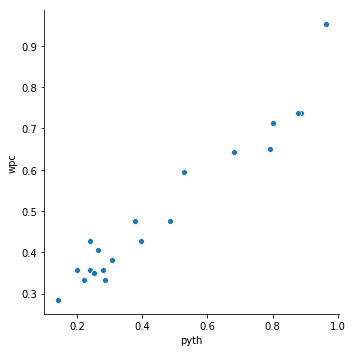

In [148]:
#plotting linear regression graph

sns.relplot(x="pyth", y="wpc", data =Perf17,)

In [149]:
# Run the regression

pyth_lm = smf.ols(formula = 'wpc ~ pyth', data=Perf17).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     269.6
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           2.81e-12
Time:                        23:38:38   Log-Likelihood:                 33.822
No. Observations:                  20   AIC:                            -63.64
Df Residuals:                      18   BIC:                            -61.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1978      0.021      9.335      0.000       0.153       0.242
pyth           0.6551      0.040     16.420      0.000       0.571       0.739
==============================================================================
Omnibus:                        6.775   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                4.322
Skew:                           1.048   Prob(JB):                        0.115
Kurtosis:                       3.891   Cond. No.                         4.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 7 (=Step 4 (away team))

In [150]:
## grouping by: home team and year 2018

PerfHome18 = EPL18.groupby(['HomeTeam'])['count','hwinvalue','FTHG','FTAG'].sum().reset_index()
PerfHome18 = PerfHome18.rename(columns={'HomeTeam':'team','count':'Ph','FTHG':'FTHGh','FTAG':'FTAGh'})
PerfHome18

,team,Ph,hwinvalue,FTHGh,FTAGh
0,Arsenal,9,7.5,29,10
1,Bournemouth,8,5.0,12,13
2,Brighton,9,5.5,14,13
3,Burnley,9,3.5,9,11
4,Chelsea,8,4.5,9,9
5,Crystal Palace,8,4.5,15,9
6,Everton,9,5.5,11,9
7,Huddersfield,8,2.5,6,13
8,Leicester,9,5.0,12,8
9,Liverpool,8,7.0,24,6


In [151]:
## grouping by: away team and year 2018

PerfAway18 = EPL18.groupby(['AwayTeam'])['count','awinvalue', 'FTHG','FTAG'].sum().reset_index()
PerfAway18 = PerfAway18.rename(columns={'AwayTeam':'team','count':'Pa','FTHG':'FTHGa','FTAG':'FTAGa'})
PerfAway18

,team,Pa,awinvalue,FTHGa,FTAGa
0,Arsenal,8,1.0,15,7
1,Bournemouth,9,4.0,16,13
2,Brighton,8,1.5,16,5
3,Burnley,8,4.0,11,9
4,Chelsea,9,4.5,15,14
5,Crystal Palace,9,4.5,14,12
6,Everton,8,2.5,17,8
7,Huddersfield,9,2.5,13,4
8,Leicester,8,2.5,20,13
9,Liverpool,9,5.0,8,12


In [152]:
# merging the tables, with 'team' as a common column
Perf18 = pd.merge(PerfAway18, PerfHome18, on = ['team'])
Perf18

,team,Pa,awinvalue,FTHGa,FTAGa,Ph,hwinvalue,FTHGh,FTAGh
0,Arsenal,8,1.0,15,7,9,7.5,29,10
1,Bournemouth,9,4.0,16,13,8,5.0,12,13
2,Brighton,8,1.5,16,5,9,5.5,14,13
3,Burnley,8,4.0,11,9,9,3.5,9,11
4,Chelsea,9,4.5,15,14,8,4.5,9,9
5,Crystal Palace,9,4.5,14,12,8,4.5,15,9
6,Everton,8,2.5,17,8,9,5.5,11,9
7,Huddersfield,9,2.5,13,4,8,2.5,6,13
8,Leicester,8,2.5,20,13,9,5.0,12,8
9,Liverpool,9,5.0,8,12,8,7.0,24,6


In [153]:
## Total Team Performance Calculation - 2018 Season
Perf18['W'] = Perf18['hwinvalue']+Perf18['awinvalue']
Perf18['G'] = Perf18['Ph']+Perf18['Pa']
Perf18['GF'] = Perf18['FTHGh']+Perf18['FTAGa']
Perf18['GA'] = Perf18['FTAGh']+Perf18['FTHGa']
Perf18

,team,Pa,awinvalue,FTHGa,FTAGa,Ph,hwinvalue,FTHGh,FTAGh,W,G,GF,GA
0,Arsenal,8,1.0,15,7,9,7.5,29,10,8.5,17,36,25
1,Bournemouth,9,4.0,16,13,8,5.0,12,13,9.0,17,25,29
2,Brighton,8,1.5,16,5,9,5.5,14,13,7.0,17,19,29
3,Burnley,8,4.0,11,9,9,3.5,9,11,7.5,17,18,22
4,Chelsea,9,4.5,15,14,8,4.5,9,9,9.0,17,23,24
5,Crystal Palace,9,4.5,14,12,8,4.5,15,9,9.0,17,27,23
6,Everton,8,2.5,17,8,9,5.5,11,9,8.0,17,19,26
7,Huddersfield,9,2.5,13,4,8,2.5,6,13,5.0,17,10,26
8,Leicester,8,2.5,20,13,9,5.0,12,8,7.5,17,25,28
9,Liverpool,9,5.0,8,12,8,7.0,24,6,12.0,17,36,14


In [154]:
# Calculation of Real and Theoretical Utilization
Perf18['wpc'] = Perf18['W']/Perf18['G']
Perf18['pyth'] = Perf18['GF']**2/(Perf18['GF']**2 + Perf18['GA']**2)
Perf18

,team,Pa,awinvalue,FTHGa,FTAGa,Ph,hwinvalue,FTHGh,FTAGh,W,G,GF,GA,wpc,pyth
0,Arsenal,8,1.0,15,7,9,7.5,29,10,8.5,17,36,25,0.500000,0.674649
1,Bournemouth,9,4.0,16,13,8,5.0,12,13,9.0,17,25,29,0.529412,0.426330
2,Brighton,8,1.5,16,5,9,5.5,14,13,7.0,17,19,29,0.411765,0.300333
3,Burnley,8,4.0,11,9,9,3.5,9,11,7.5,17,18,22,0.441176,0.400990
4,Chelsea,9,4.5,15,14,8,4.5,9,9,9.0,17,23,24,0.529412,0.478733
5,Crystal Palace,9,4.5,14,12,8,4.5,15,9,9.0,17,27,23,0.529412,0.579491
6,Everton,8,2.5,17,8,9,5.5,11,9,8.0,17,19,26,0.470588,0.348120
7,Huddersfield,9,2.5,13,4,8,2.5,6,13,5.0,17,10,26,0.294118,0.128866
8,Leicester,8,2.5,20,13,9,5.0,12,8,7.5,17,25,28,0.441176,0.443577
9,Liverpool,9,5.0,8,12,8,7.0,24,6,12.0,17,36,14,0.705882,0.868633


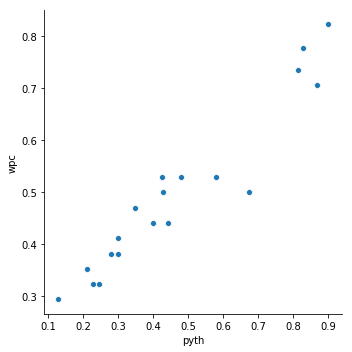

In [155]:
#plotting linear regression graph

sns.relplot(x="pyth", y="wpc", data =Perf18,)

In [156]:
# Run the regression

pyth_lm = smf.ols(formula = 'wpc ~ pyth', data=Perf18).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     191.1
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           5.02e-11
Time:                        23:38:40   Log-Likelihood:                 34.030
No. Observations:                  20   AIC:                            -64.06
Df Residuals:                      18   BIC:                            -62.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2040      0.024      8.586      0.000       0.154       0.254
pyth           0.6237      0.045     13.823      0.000       0.529       0.718
==============================================================================
Omnibus:                        5.199   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                2.933
Skew:                          -0.826   Prob(JB):                        0.231
Kurtosis:                       3.890   Cond. No.                         5.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
#creating a df with both years

PerfTOtal = pd.concat([Perf17, Perf18], ignore_index=True)

In [158]:
#Correlation Matrix - Total Team Performance

correlacao = PerfTOtal.corr()
print(correlacao)

                 Pa  awinvalue     FTHGa     FTAGa        Ph  hwinvalue  \
Pa         1.000000   0.318040  0.186512  0.219765  0.542137   0.182120   
awinvalue  0.318040   1.000000 -0.585072  0.849018  0.183032   0.615457   
FTHGa      0.186512  -0.585072  1.000000 -0.235020  0.109326  -0.328569   
FTAGa      0.219765   0.849018 -0.235020  1.000000  0.226122   0.633662   
Ph         0.542137   0.183032  0.109326  0.226122  1.000000   0.278880   
hwinvalue  0.182120   0.615457 -0.328569  0.633662  0.278880   1.000000   
FTHGh      0.076929   0.561999 -0.380094  0.601071  0.160991   0.854416   
FTAGh      0.268206  -0.447673  0.434651 -0.379689  0.341256  -0.557501   
W          0.280252   0.904371 -0.512057  0.827996  0.255533   0.892951   
G          0.872615   0.283694  0.167526  0.253951  0.883482   0.263628   
GF         0.160397   0.777408 -0.348950  0.879395  0.213788   0.839334   
GA         0.267080  -0.611821  0.855992 -0.360496  0.262202  -0.519304   
wpc        0.035974   0.8